In [15]:
import numpy as np
import matplotlib.pyplot as plt

Входные параметры - количество реализаций в выборке N и $\theta$ - параметр распределения (согласно заданию, распределение равномерное от 0 до $\theta$). sample - выборкаю

In [16]:
N = 10**4
theta = 5

sample = theta*np.random.rand(N)

Определяем функции оценок. Каждая принимает на вход n - размер выборки, для которого нужно считать оценкую

In [17]:
def est0(n):
    return 2*sum(sample[:n])/float(n)


def est1(n):
    return est0(n)*0.5 + sample[n-1]*0.5


def est2(n):
    return (n+1)*sample[0]


def est3(n):
    return sample[0] + sample[n-1]


def est4(n):
    return (n+1)/float(n)*sample[n-1]

est_functions = [est0, est1, est2, est3, est4]

Считаем модули разности оценок и $\theta$ для каждого значения $n\leq N$. 

In [18]:
est_rows = [[],[],[],[],[]]
for n in range(N+1)[1:]:
    for i in range(5):
        est_rows[i].append(np.abs(est_functions[i](n) - theta))

Строим графики.

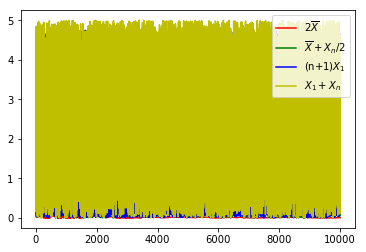

In [24]:
est_colors = ['r', 'g', 'b', 'y', 'm']
est_labels = ['2$\overline{X}$', '$\overline{X} + {X_{n}}/{2}$', '(n+1)$X_1$', '$X_1 + X_n$', '${n+1}/{n}X_n$']

def plot_rows(limits=None):
    for i in range(len(est_rows)):
        plt.plot(range(N+1)[1:], est_rows[i], color=est_colors[i], label=est_labels[i])
        plt.legend()
    if limits:
        plt.axis(limits)
    plt.show()
    
plot_rows()

Из графика видно, что оценка $(n+1)X_1$ линейно уходит от $\theta$ (ожидаемо, ведь это просто линейная функция от n с коэффицентом, равным первому выпавшему значению). Будем строить графики без нее. Для остальных оценок строю три графика - для значений n от 0 до 100, от N/2 до N/2+100 и от N-100 до N соответственно.

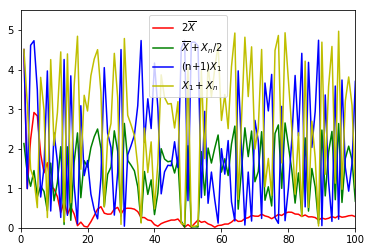

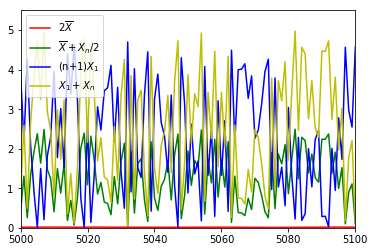

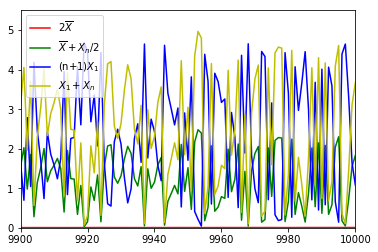

In [26]:
if len(est_rows) == 5:
    del est_rows[2]
    del est_colors[2]
    del est_labels[2]
plot_rows([0, 100, 0.0, 1.1*theta])
plot_rows([N/2, N/2 + 100, 0.0, 1.1*theta])
plot_rows([N - 100, N, 0.0, 1.1*theta])